Model estryfikacji (oligomeryzacji) w układzie zamkniętym, w którym ustala się stan równowagi:

$$A + B \longleftrightarrow AB + W$$ 
$$AB + A \longleftrightarrow ABA + W$$ 
$$AB + B \longleftrightarrow BAB + W$$ 
$$ABA + B \longleftrightarrow ABAB + W$$ 


gdzie: A - diol, B - kwas dikarboksylowy, W - woda, AB, ABA, BAB, ABAB - oligoestry

Założenia: 

Wartość stałej równowagi dla każdego etapu ideantyczna, K = 5

[A]0 = 5mol/L

[B]0 = 5mol/L


In [1]:
from scipy.optimize import fsolve
import numpy as np


K = 5
a0 = 5
b0 = 5


# Model estryfikacji (ME)
def model(X):
    a, b, ab, aba, bab, abab, w = X
    eq1 = ab*w - K*a*b
    eq2 = aba*w - K*ab*a
    eq3 = bab*w - K*ab*b
    eq4 = abab*w - K*aba*b
    eq5 = a0 - a - ab - 2*aba - bab - 2*abab # bilans materuałowy A
    eq6 = b0 - b - ab - aba - 2*bab - 2*abab # bilans materiałowy B
    eq7 = w - ab - 2*aba - 2*bab - 3*abab # bilans liczby moli wiązań estrowych i wody
    return [eq1, eq2, eq3, eq4, eq5, eq6, eq7]

a = 1
b = 1
ab = 1
aba = 1
bab = 1
abab = 1
w = 1

guess = [a, b, ab, aba, bab, abab, w]
a, b, ab, aba, bab, abab, w = fsolve(model, guess)
print(a, b, ab, aba, bab, abab, w)

(0.926869834948572, 0.92686983494857222, 0.80090833399147532, 0.69206498611940093, 0.69206498611940026, 0.59801343635087556, 5.3632085875217035)


**Sprawdzenie1** - bilans masy - przed i po ustaleniu się równowagi:

In [8]:
# Bilans substratów - łaączna masa:
a0*Ma + b0*Mb

900.85

In [9]:
#przykłądowe masy molowe monomerów
Ma = 62.07 #glikol etylenowy
Mb = 118.1 #kwas burszynowy
Mw = 18 # woda ;)

# masy molowe produktów kondensacji:
Mab = Ma + Mb - Mw
Maba = Ma + Mb + Ma - Mw - Mw
Mbab = Ma + Mb + Mb - Mw - Mw
Mabab = Ma + Mb + Ma + Mb - Mw - Mw - Mw

# łączna masa reagentów w stanie równowagi:
a*Ma + b*Mb + ab*Mab + aba*Maba + bab*Mbab + abab*Mabab + w*Mw

900.85000000000014

Sprawdzić czy bilans masy zgadza się, gdy zmieni się wsópłczynniki w Modelu (eq5, 6 i 7).

**Sprawdzenie2** - jakie będą stężenia równowagowe gdy K >> 1 ?

Model zakłada, że abab jest końcowym produktem estryfikacji, dla [a]0 = 5 [b]0 = 5,  jego stężenie powinno dążyć do [abab] -> 2.5 mol/L, natomias wody do [h2o] -> 7.5 mol/L

In [10]:
from scipy.optimize import fsolve
import numpy as np


# dle K = 1e1 1e3 1e5 1e6 1e8
# obserwować [abab] i [w]

K = 1e8
a0 = 5
b0 = 5

# Model ME (j.w.)
def model(X):
    a, b, ab, aba, bab, abab, w = X
    eq1 = ab*w - K*a*b
    eq2 = aba*w - K*ab*a
    eq3 = bab*w - K*ab*b
    eq4 = abab*w - K*aba*b
    eq5 = a0 - a - ab - 2*aba - bab - 2*abab
    eq6 = b0 - b - ab - aba - 2*bab - 2*abab
    eq7 = w - ab - 2*aba - 2*bab - 3*abab
    return [eq1, eq2, eq3, eq4, eq5, eq6, eq7]

a = 1
b = 1
ab = 1
aba = 1
bab = 1
abab = 1
w = 1

guess = [a, b, ab, aba, bab, abab, w]
a, b, ab, aba, bab, abab, w = fsolve(model, guess)

print(a, b, ab, aba, bab, abab, w)

(5.6614253213008826e-06, 5.661425318899861e-06, 0.0004282943481757188, 0.03240103654047221, 0.03240103654047792, 2.4511814673025398, 7.4835768424176967)


Wpływ wartości K na stężenia równowagowe - wersja bardziej zaawansowana skryptu:

(0.62772155957657394, 0.62772155957657405, 0.67212437777734058, 0.71966809531089593, 0.71966809531089593, 0.77057488835669907, 5.8625214240910211, 10.0)
(0.20238056297335197, 0.20238056297335189, 0.36764155567268453, 0.66785224572408808, 0.66785224572408808, 1.2132105720908499, 6.6786822548415863, 59.948425031894089)
(0.058894986277640539, 0.058894986277640532, 0.17660172179585187, 0.5295555719162981, 0.52955557191629798, 1.5879182880888063, 7.0585788737274644, 359.38136638046257)
(0.016334805386370443, 0.01633480538783769, 0.079367529286896568, 0.3856308389291021, 0.38563083892763472, 1.873702574270447, 7.2429986078117121, 2154.4346900318847)
(0.0044211854875018611, 0.0044211854875018533, 0.03438316534988179, 0.26739481137338644, 0.26739481137338594, 2.0795056075212286, 7.3424792334071132, 12915.496650148827)
(0.0011803046205294729, 0.0011803046205291414, 0.014574343580184052, 0.17996327990143704, 0.17996327990143715, 2.2221777560474876, 7.4009607313283956, 77426.368268112783)
(0.0003

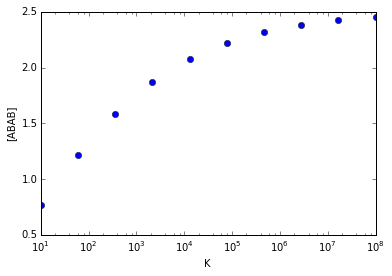

In [11]:
from scipy.optimize import fsolve
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt


# Model ME (j.w.)

def model(X, K):
    a0 = 5
    b0 = 5
    a, b, ab, aba, bab, abab, w = X
    eq1 = ab*w - K*a*b
    eq2 = aba*w - K*ab*a
    eq3 = bab*w - K*ab*b
    eq4 = abab*w - K*aba*b
    eq5 = a0 - a - ab - 2*aba - bab - 2*abab
    eq6 = b0 - b - ab - aba - 2*bab - 2*abab
    eq7 = w - ab - 2*aba - 2*bab - 3*abab
    return [eq1, eq2, eq3, eq4, eq5, eq6, eq7]


a = 1
b = 1
ab = 1
aba = 1
bab = 1
abab = 1
w = 1

guess = [a, b, ab, aba, bab, abab, w]

plt.xscale('log')
plt.xlabel('K')
plt.ylabel('[ABAB]')

# logspace zamiast linspace!
# sprawdzić:
# print np.logspace(1,5,5)


# wersja bez zapamiętywania wyników:
for K in np.logspace(1,8,10):
    a, b, ab, aba, bab, abab, w = fsolve(model, guess, K)
    print(a, b, ab, aba, bab, abab, w, K)
    plt.plot(K,abab,'bo')

    

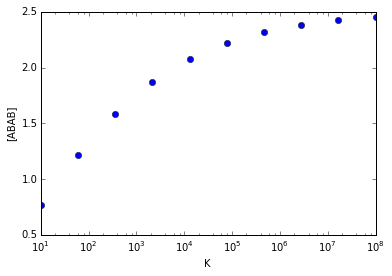

In [12]:
from scipy.optimize import fsolve
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt


# Model ME (j.w.)

def model(X, K):
    a0 = 5
    b0 = 5
    a, b, ab, aba, bab, abab, w = X
    eq1 = ab*w - K*a*b
    eq2 = aba*w - K*ab*a
    eq3 = bab*w - K*ab*b
    eq4 = abab*w - K*aba*b
    eq5 = a0 - a - ab - 2*aba - bab - 2*abab
    eq6 = b0 - b - ab - aba - 2*bab - 2*abab
    eq7 = w - ab - 2*aba - 2*bab - 3*abab
    return [eq1, eq2, eq3, eq4, eq5, eq6, eq7]


a = 1
b = 1
ab = 1
aba = 1
bab = 1
abab = 1
w = 1

guess = [a, b, ab, aba, bab, abab, w]

# zmianne-listy do przechowywania wyników
Kx = []
ABABy = []

# wersja z zapamiętywaniem wyników obliczeń
for K in np.logspace(1,8,10):
    a, b, ab, aba, bab, abab, w = fsolve(model, guess, K)
    Kx.append(K)
    ABABy.append(abab)

    
plt.xscale('log')
plt.xlabel('K')
plt.ylabel('[ABAB]')
plt.plot(Kx,ABABy,'bo')

